### Importar librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
import branca.colormap as cm

### Carga y limpieza de datos 

In [3]:
df_desercion=pd.read_csv("Datos_Procesados\\Desercion_Escolar.csv",sep=",")

### Validar tipos de datos 

In [180]:
print(df_desercion.dtypes)

Año                   int64
Año_Lectivo          object
Zona                 object
Provincia            object
Cantón               object
Sostenimiento        object
Área                 object
Regimen_Escolar      object
Jurisdiccion         object
Total_Estudiantes     int64
Promovidos            int64
No_Promovidos         int64
Abandono              int64
dtype: object


El dataframe contiene 5 variables numericas  y 8 variables categoricas 

### Validar valores nulos 

In [181]:
print(df_desercion.isna().sum())

Año                  0
Año_Lectivo          0
Zona                 0
Provincia            0
Cantón               0
Sostenimiento        0
Área                 0
Regimen_Escolar      0
Jurisdiccion         0
Total_Estudiantes    0
Promovidos           0
No_Promovidos        0
Abandono             0
dtype: int64


El dataframe no contine valores nulos 

### Seleccionar Periodos para el analisis 

Para analizar las tendencias y evolucion temporal se acortara los años del analisis , nos concentraremos en los ultimos 10 años 

In [4]:
df_2014_2023=df_desercion[df_desercion["Año"]>=2014].reset_index(drop=True)

Funcion para crear una nueva variables : Tasa_Abandono

In [5]:
# Funcion para calcular tasa de abandono
def tasa_abandono(Abandono,Total_Estudiantes):
    if Abandono == 0:
        return 0
    tasa= (Abandono/Total_Estudiantes)*100
    tasa= round(tasa,2)
    return tasa

### ¿Cómo ha evolucionado la deserción escolar en Ecuador entre 2014 y 2023?

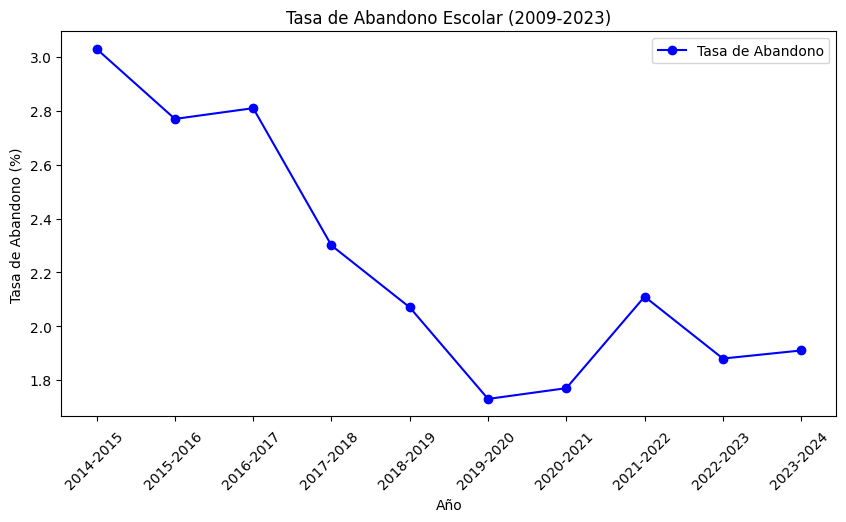

In [6]:
#Calculo de tasa de abandono por año 
df_año=df_2014_2023.groupby("Año_Lectivo").agg({"Total_Estudiantes":"sum","Abandono":"sum"}).reset_index()
df_año["Tasa_Abandono"]=df_año.apply(lambda row: tasa_abandono(row["Abandono"],row["Total_Estudiantes"]),axis=1)

## Graficar tendencia temporal de la tasa de abandono escolar 
plt.figure(figsize=(10, 5))
plt.plot(df_año["Año_Lectivo"], df_año["Tasa_Abandono"], marker="o", linestyle="-", color="b", label="Tasa de Abandono")

plt.xlabel("Año")
plt.ylabel("Tasa de Abandono (%)")
plt.title("Tasa de Abandono Escolar (2009-2023)")
plt.xticks(df_año["Año_Lectivo"], rotation=45)
plt.legend()

plt.show() 

La tasa de abandono mostró una tendencia a la baja desde el periodo lectivo 2014-2015, alcanzando aproximadamente el 1.7% en el periodo 2019-2020, la más baja de los últimos 10 años. Sin embargo, a partir de 2020 se observa un repunte y un cambio de tendencia, siendo el periodo 2021-2022 aquel en el que se registra la tasa de deserción más alta de los últimos cinco años. Esta cifra puede explicarse considerando la pandemia de COVID-19 como un evento atípico que afectó la economía y generó variaciones inusuales en los indicadores del país.

#### ¿Se puede observan algun patron en las variables Zona ,Sostenimiento , Area , Regimen Escolar  para el periodo lectivo 2023-2024?

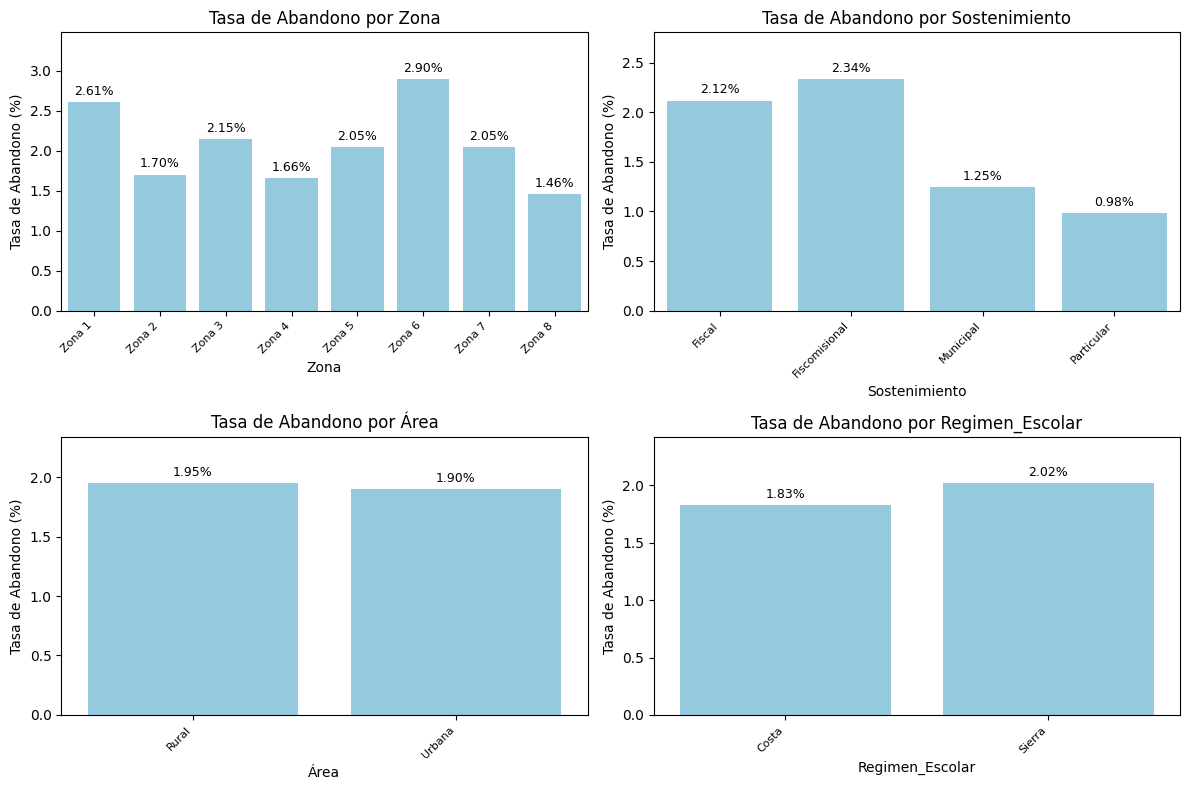

In [7]:
Periodo_2023_2024=df_desercion[df_desercion["Año"]==2023].reset_index(drop=True)

col_categoria = ["Zona", "Sostenimiento", "Área", "Regimen_Escolar"]

# Crear la figura con 4 subgráficos
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(col_categoria):
    # Calcular la tasa de abandono por categoría
    df_categoria = (
        Periodo_2023_2024.groupby(col)
        .agg(
            Total_Estudiantes=("Total_Estudiantes", "sum"),
            Abandono=("Abandono", "sum")
        )
        .assign(Tasa_Abandono=lambda df: df.apply(
            lambda row: tasa_abandono(row["Abandono"], row["Total_Estudiantes"]), axis=1
        ))
        .reset_index()
    )

    # Crear el gráfico de barras
    ax = axes[i]
    bars = sns.barplot(
        data=df_categoria,
        x=col,
        y="Tasa_Abandono",
        estimator=sum,
        errorbar=None,
        ax=ax,
        color="skyblue"
    )

    # Agregar etiquetas de datos encima de cada barra
    for bar in bars.containers:
        bars.bar_label(bar, fmt="%.2f%%", label_type="edge", fontsize=9, padding=3)

    ax.set_title(f"Tasa de Abandono por {col}")
    ax.set_ylabel("Tasa de Abandono (%)")
    
    # Ajustar etiquetas de categorías en el eje X
    plt.setp(ax.get_xticklabels(), ha="right", fontsize=8, rotation=45)
    
    # Ajustar el límite superior del eje Y para dar más espacio
    ax.set_ylim(0, df_categoria["Tasa_Abandono"].max() * 1.2)  # ↑ Aumenta un 20% el espacio superior

plt.tight_layout()  # Ajusta los gráficos para que no se sobrepongan
plt.show()

Las zonas 6, 1 y 3 registran las tasas más altas de deserción escolar en Ecuador, con valores de 2.9%, 2.61% y 2.15%, respectivamente. Estos resultados reflejan posibles desafíos estructurales en el acceso y permanencia en el sistema educativo, especialmente en provincias como Azuay, Cañar y Morona Santiago (Zona 6), Esmeraldas, Carchi, Imbabura y Sucumbíos (Zona 1), y Tungurahua, Chimborazo, Cotopaxi y Pastaza (Zona 3).

El abandono escolar en Ecuador también varía según el tipo de sostenimiento de la institución educativa. Las cifras muestran que las unidades fiscomisionales presentan una tasa de deserción del 2.34%, ligeramente superior a la de las instituciones fiscales, con un 2.12%.En ambos casos, las tasas reflejan la necesidad de fortalecer políticas que garanticen la permanencia estudiantil, especialmente en sectores vulnerables.

La tasa de abandono escolar también muestra diferencias entre las zonas rurales y urbanas. En el área rural, la deserción alcanza el 1.95%, mientras que en la urbana es del 1.90%. Aunque la brecha es pequeña, la mayor tasa en el ámbito rural podría estar vinculada a factores como la dificultad de acceso a las instituciones educativas, limitaciones en infraestructura y recursos, así como la necesidad de que los estudiantes trabajen para contribuir a la economía familiar. Estos datos evidencian la importancia de implementar estrategias específicas para reducir el abandono escolar en contextos rurales, garantizando mejores oportunidades de educación.

 En el régimen Costa, la tasa de deserción es del 1.83%, mientras que en la Sierra alcanza el 2.02%. En la Sierra, la mayor tasa de abandono puede deberse a la necesidad de los estudiantes de apoyar en actividades agrícolas o migrar por trabajo, mientras que en la Costa, aunque la deserción es menor, aún representa un desafío para el sistema educativo. Estos datos resaltan la importancia de adaptar estrategias de retención escolar según las particularidades de cada región.

### ¿Cuáles son las provincias más afectadas por la deserción escolar en el ultimo periodo lectivo?


In [8]:
df_provincia=Periodo_2023_2024.groupby("Provincia").agg({"Total_Estudiantes":"sum","Abandono":"sum"}).reset_index()

#Calculo de tasa de abandono por provincia 
df_provincia["Tasa_Abandono"]=df_provincia.apply(lambda row:tasa_abandono(row["Abandono"],row["Total_Estudiantes"]),axis=1)
 
# Cargar datos del shapefile que contiene informacion geografica de Ecuador y que serviara para la creacion del mapa 
gdf= gpd.read_file(r"C:\Users\HP\Documents\1.Fabricio Coque\16.Proyectos\3.Python\Analisis_Desercion_Escolar\Shapefile_Ecuador\ecuador.shp") 


Antes de crear el mapa , se deben manipular algunos nombres en provincias y columnas para que coincidan cpn shapefile 

In [ ]:
# Crear una copia para evitar modificar el original
df_mapa = df_provincia.copy()
# Renombrar la columna para que coincida con el shapefile
df_mapa.rename(columns={"Provincia": "DPA_DESPRO"}, inplace=True)
# Reemplazar nombres para que coincidan con el shapefile
df_mapa["DPA_DESPRO"] = df_mapa["DPA_DESPRO"].replace({"CAÑAR": "CAÃ\x91AR"})
# Fusionar con el shapefile
gdf2 = gdf.merge(df_mapa, on="DPA_DESPRO", how="left")
# Convertir NaN a 0 antes de cambiar a int
gdf2["Total_Estudiantes"] = gdf2["Total_Estudiantes"].fillna(0).astype(int)
gdf2["Abandono"] = gdf2["Abandono"].fillna(0).astype(int)
gdf2["Tasa_Abandono"] = gdf2["Tasa_Abandono"].fillna(0).astype(float)
gdf2 = gdf2[gdf2["DPA_DESPRO"] != "GALAPAGOS"]
# Mostrar el resultado
gdf2.head()

Creacion del Mapa

In [10]:
import matplotlib.colors as mcolors

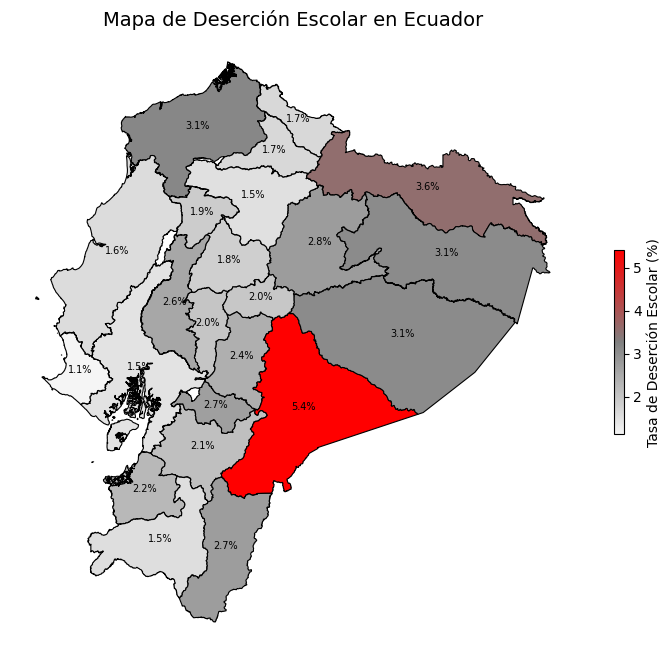

In [105]:
# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 8))

# Crear una paleta de colores personalizada
cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", ["#f5f5f5", "gray", "red"])

# Definir la escala de colores en tonos de gris y rojo
gdf2.plot(column="Tasa_Abandono", 
          cmap=cmap,  # Usa 'Reds' para rojo degradado
          linewidth=0.8, 
          edgecolor="black", 
          legend=True, 
          legend_kwds={"label": "Tasa de Deserción Escolar (%)","shrink": 0.3},
          ax=ax)

# Agregar etiquetas con el nombre de la provincia y la tasa de deserción
for idx, row in gdf2.iterrows():
    centroid = row["geometry"].centroid  # Obtener centroide de la provincia
    ax.annotate(text=f"{row['Tasa_Abandono']:.1f}%",  # Solo muestra la tasa
                xy=(centroid.x, centroid.y),
                ha="center", fontsize=7, color="black")


# Agregar títulos y mejorar la visualización
ax.set_title("Mapa de Deserción Escolar en Ecuador", fontsize=14)
ax.axis("off")  # Ocultar ejes

# Mostrar el mapa
plt.show()

El análisis de la deserción escolar en Ecuador revela que las provincias con las tasas más altas se concentran principalmente en la Amazonía y la región costera. Morona Santiago registra la cifra más elevada con un 5.42%, seguida de Sucumbíos (3.57%), Pastaza (3.08%), Esmeraldas (3.14%), Napo (2.75%) y Zamora Chinchipe (2.74%). Estas provincias comparten características como la dispersión geográfica, dificultades de acceso a centros educativos y limitaciones en infraestructura, factores que pueden estar influyendo en el abandono escolar. Además, en algunas zonas, la migración de las familias y la necesidad de que los jóvenes trabajen para contribuir a la economía del hogar podrían estar exacerbando esta problemática.

Para comprender las altas tasas de deserción escolar en las provincias de Esmeraldas, Morona Santiago, Napo, Orellana, Pastaza y Sucumbíos, es esencial analizar factores como la pobreza, el empleo infantil y la disponibilidad de instituciones educativas.

### ¿Las Provincias con las tasas de desercion mas altas , son las que tienen mayores indices de pobreza ? 

In [ ]:
pb=pd.read_csv("Datos_Procesados\\Pobreza.csv",sep=",")
pobreza_2023=pb[pb["Año"]==2023].sort_values(by="Pobreza por ingresos", ascending=False).reset_index(drop=True)
pobreza_2023
# Diccionario de corrección de nombres
correcciones = {
    "BOLÍVAR": "BOLIVAR",
    "CAÑAR": "CAÃ\x91AR",
    "LOS RÍOS": "LOS RIOS",
    "MANABÍ": "MANABI",
    "SUCUMBÍOS": "SUCUMBIOS",
    "SANTO DOMINGO": "SANTO DOMINGO DE LOS TSACHILAS"
}
pobreza_2023 = pobreza_2023.rename(columns={"Provincia": "DPA_DESPRO"})
pobreza_2023["DPA_DESPRO"] = pobreza_2023["DPA_DESPRO"].replace(correcciones)

gdf_test=gdf.copy()
gdf_test=pd.merge(gdf_test,pobreza_2023,on="DPA_DESPRO" ,how="left")
gdf_test = gdf_test[gdf_test["DPA_DESPRO"] != "GALAPAGOS"]
gdf_test = gdf_test[gdf_test["DPA_DESPRO"] != "ZONA NO DELIMITADA"]

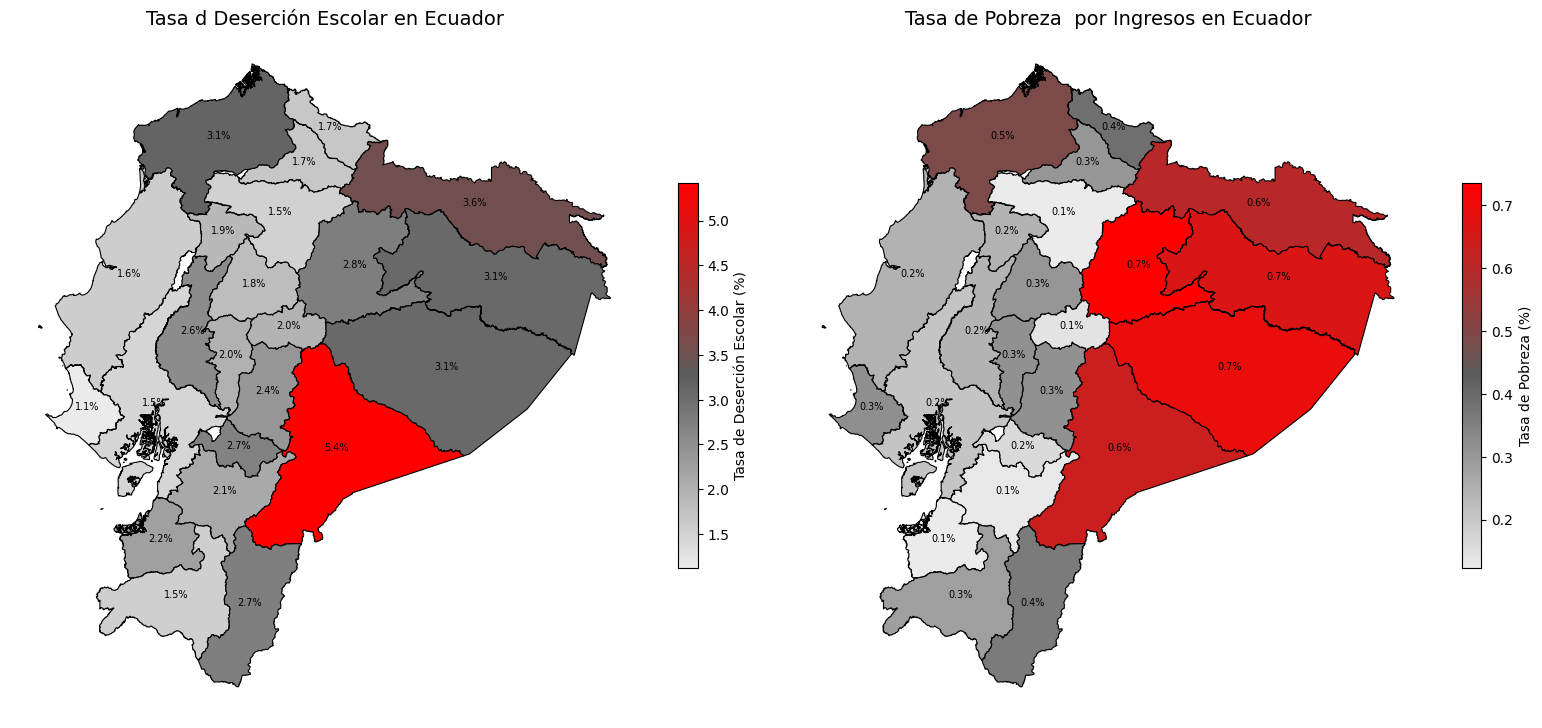

In [104]:
# Crear la figura con dos ejes (subplots)
fig, axes = plt.subplots(1, 2, figsize=(16, 8))  # 1 fila, 2 columnas

# Crear paleta de colores personalizada para la deserción
cmap1 = mcolors.LinearSegmentedColormap.from_list("custom_cmap", ["#ebebeb", "#5c5c5c", "red"])

# Crear paleta de colores para la pobreza
cmap2 = mcolors.LinearSegmentedColormap.from_list("custom_cmap2", ["#ebebeb", "#5c5c5c", "red"])

# --- MAPA 1: Tasa de Deserción Escolar ---
gdf2.plot(column="Tasa_Abandono", 
          cmap=cmap1,  
          linewidth=0.8, 
          edgecolor="black", 
          legend=True, 
          legend_kwds={"label": "Tasa de Deserción Escolar (%)", "shrink": 0.5},
          ax=axes[0])

# Agregar etiquetas con la tasa de deserción
for idx, row in gdf2.iterrows():
    centroid = row["geometry"].centroid  
    axes[0].annotate(text=f"{row['Tasa_Abandono']:.1f}%",  
                     xy=(centroid.x, centroid.y),
                     ha="center", fontsize=7, color="black")

# Configurar título y ocultar ejes
axes[0].set_title("Tasa d Deserción Escolar en Ecuador", fontsize=14)
axes[0].axis("off")  

# --- MAPA 2: Tasa de Pobreza ---
gdf_test.plot(column="Pobreza por ingresos",  
          cmap=cmap2,  
          linewidth=0.8, 
          edgecolor="black", 
          legend=True, 
          legend_kwds={"label": "Tasa de Pobreza (%)", "shrink": 0.5},
          ax=axes[1])

# Agregar etiquetas con la tasa de pobreza
for idx, row in gdf_test.iterrows():
    centroid = row["geometry"].centroid  
    axes[1].annotate(text=f"{row['Pobreza por ingresos']:.1f}%",  
                     xy=(centroid.x, centroid.y),
                     ha="center", fontsize=7, color="black")

# Configurar título y ocultar ejes
axes[1].set_title("Tasa de Pobreza  por Ingresos en Ecuador", fontsize=14)
axes[1].axis("off")  

# Ajustar el diseño para que los mapas no se superpongan
plt.tight_layout()

# Mostrar la figura con ambos mapas
plt.show()

Al comparar los mapas de deserción escolar y pobreza por ingresos, se observa una clara coincidencia en las provincias con los valores más altos en ambas variables. Las zonas con mayor abandono escolar, como Morona Santiago, Sucumbíos, Pastaza, Esmeraldas, Napo y Zamora Chinchipe, también presentan los niveles más elevados de pobreza, lo que sugiere una posible relación entre estos factores. Para analizar esta conexión de manera más precisa, aplicaré un gráfico de dispersión y calcularé el coeficiente de correlación de Pearson, lo que permitirá medir la fuerza y dirección de la relación entre la pobreza y la deserción escolar en estas regiones.

### ¿Existe alguna correlacion entre pobreza y desercion escolar ? 

In [ ]:
multivarable=pd.read_csv("Datos_Procesados\\variables.csv",sep=",")
multivarable2023=multivarable[multivarable["Año"]==2023].reset_index(drop=True)
multivarable2023

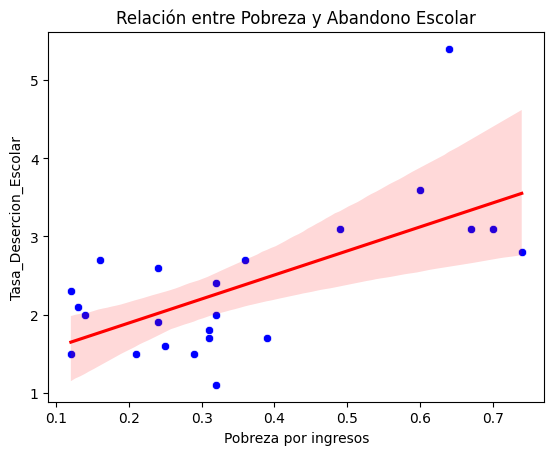

In [ ]:
# Graficar dispersión entre Tasa de Pobreza y Tasa de Abandono Escolar

plt.Figure(figsize=(8,6))
sns.scatterplot(x=multivarable2023["Pobreza por ingresos"],y=multivarable2023["Tasa_Desercion_Escolar"],color="blue")
sns.regplot(x=multivarable2023["Pobreza por ingresos"],y=multivarable2023["Tasa_Desercion_Escolar"], scatter=False, color="red")

plt.title("Relación entre Pobreza y Abandono Escolar")

plt.show()

In [124]:
correlacion=multivarable2023["Pobreza por ingresos"].corr(multivarable2023["Tasa_Desercion_Escolar"])
print(f"Coeficiente de correlacion de Pearson :{correlacion:.2f}")

Coeficiente de correlacion de Pearson :0.65


El cálculo del coeficiente de correlación de Pearson entre la pobreza por ingresos y la tasa de deserción escolar arroja un valor de 0.65, lo que indica una correlación positiva moderada-alta entre ambas variables. Esto significa que, a medida que aumenta la pobreza en una provincia, también tiende a incrementarse la deserción escolar. Aunque esta relación no implica causalidad directa, sí sugiere que las condiciones económicas pueden ser un factor determinante en la permanencia de los estudiantes en el sistema educativo. Este hallazgo refuerza la necesidad de políticas integrales que combatan la pobreza para reducir el abandono escolar en las zonas más afectadas.

### Conclusión


El análisis de la deserción escolar en Ecuador revela una tendencia descendente en los últimos años, interrumpida por un repunte significativo a partir del 2020, posiblemente influenciado por los efectos de la pandemia de COVID-19. Las provincias con mayores tasas de abandono escolar se concentran en la Amazonía y la región costera, donde factores como la dispersión geográfica, la falta de infraestructura educativa y la migración laboral afectan la permanencia estudiantil.

Las diferencias entre zonas rurales y urbanas, así como entre los distintos regímenes y tipos de sostenimiento educativo, evidencian la necesidad de estrategias diferenciadas para combatir el abandono escolar. La correlación positiva moderada-alta (0.65) entre pobreza y deserción sugiere que las condiciones económicas son un factor determinante en la continuidad educativa.

Estos hallazgos refuerzan la importancia de implementar políticas públicas integrales que aborden tanto la mejora del acceso y calidad educativa como la reducción de la pobreza en las regiones más vulnerables, garantizando así mayores oportunidades para los estudiantes en Ecuador.